1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


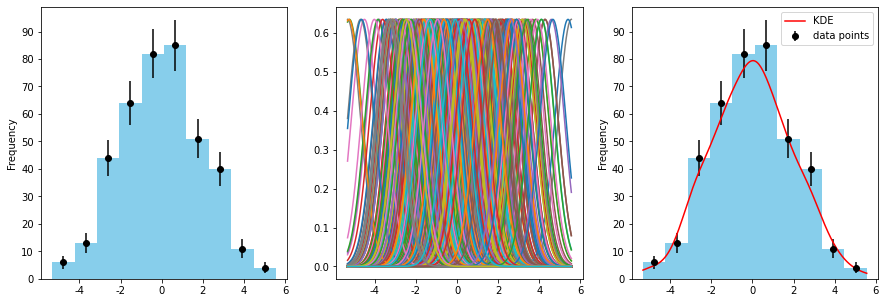

In [1]:
import numpy as np
import scipy as sp
from scipy.stats import norm
from scipy.integrate import trapz
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

### histogram

ID = 2044719
np.random.seed(ID)

mu, sigma, N = 0, 2, 400
x = np.random.normal(mu, sigma, N)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

nbin = int(np.ceil(np.log2(N)) + 1) # Sturges' formula for choosing the number of bins

bin_counts, bin_edges, patches = ax[0].hist(x, bins=nbin, color='skyblue')
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax[0].errorbar(bin_centers, bin_counts, yerr=np.sqrt(bin_counts), fmt='o', color='black')

ax[0].set_ylabel('Frequency')

ax[0].xaxis.set_major_locator(MultipleLocator(2))
ax[0].xaxis.set_major_formatter(FormatStrFormatter("%d"))

ax[0].yaxis.set_major_locator(MultipleLocator(10))
ax[0].yaxis.set_major_formatter(FormatStrFormatter("%d"))

### gaussians

grid = np.linspace(x.min(), x.max(), N)
gaussians = np.zeros((N,N))
width = 1.06*x.std()*np.power(x.size,-1/5)
for i in range(N):
    gaussians[i] = norm.pdf(grid, loc=x[i], scale=width)
    ax[1].plot(grid, gaussians[i])

ax[1].xaxis.set_major_locator(MultipleLocator(2))
ax[1].xaxis.set_major_formatter(FormatStrFormatter("%d"))

ax[1].yaxis.set_major_locator(MultipleLocator(0.1))
ax[1].yaxis.set_major_formatter(FormatStrFormatter("%.1f"))

### KDE

kde = np.sum(gaussians, axis=0)
A = trapz(kde, dx=(grid[1]-grid[0]))

ax[2].hist(x, bins=nbin, color='skyblue')
ax[2].errorbar(bin_centers, bin_counts, yerr=np.sqrt(bin_counts), label='data points', fmt='o', color='black')
ax[2].plot(grid, kde*(N/A), label='KDE', color='red')

ax[2].set_ylabel('Frequency')
ax[2].legend()

ax[2].xaxis.set_major_locator(MultipleLocator(2))
ax[2].xaxis.set_major_formatter(FormatStrFormatter("%d"))

ax[2].yaxis.set_major_locator(MultipleLocator(10))
ax[2].yaxis.set_major_formatter(FormatStrFormatter("%d"))

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

<AxesSubplot:xlabel='x', ylabel='y'>

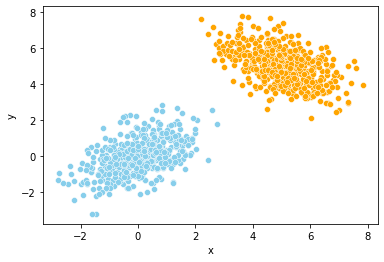

In [10]:
import pandas as pd
import seaborn as sns

ID = 2044719
np.random.seed(ID)

N = 500

mean1 = [0, 0]
mean2 = [5, 5]

cov1 = [[1, .5], [.5, 1]]
cov2 = [[1, -.5], [-.5, 1]]

gaussian1 = np.random.multivariate_normal(mean1, cov1, N)
gaussian2 = np.random.multivariate_normal(mean2, cov2, N)

df1 = pd.DataFrame(gaussian1, columns = ["x", "y"])
df2 = pd.DataFrame(gaussian2, columns = ["x", "y"]) 

fig, ax = plt.subplots()
sns.scatterplot(x="x", y="y", data=df1, ax=ax, color='skyblue')
sns.scatterplot(x="x", y="y", data=df2, ax=ax, color='orange')

--2021-12-09 23:05:28--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2021-12-09 23:05:29--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc214ea0a4981c64b0f9aa6ab067.dl.dropboxusercontent.com/cd/0/inline/Bbj_ZsppA2WE1ZqAN0lMsGzjkNrbbBuVy3aHPtSg3Z6V2C6m8HkCNPGFLZh-UufhCgUaBJ3sPikApi-nRBwmVR_iga8uMceqmRj5g7EyAw6ngk4md9pqn36alMP_tI7OUSURgATSFtwNla_BL7XYg0VM/file# [following]
--2021-12-09 23:05:29--  https://uc214ea0a4981c64b0f9aa6ab067.dl.dropboxusercontent.com/cd/0/inline/Bbj_ZsppA2WE1ZqAN0lMsGzjkNrbbB

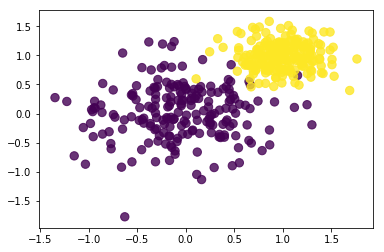

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [4]:
#! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
df = pd.DataFrame(np.load('residuals_261.npy', allow_pickle=True).item())
df.head()

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


In [11]:
data = df[abs(df['residuals']) < 2]

In [6]:
from scipy import stats

reg = stats.linregress(data['distances'], data['residuals'])
print("slope:", reg.slope)
print("intercept:", reg.intercept)

slope: 0.0032597701220305813
intercept: -0.1543281676306947


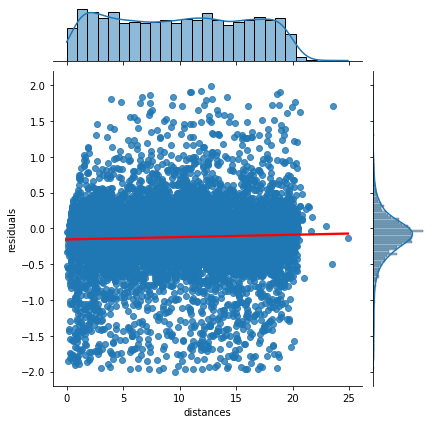

In [7]:
sns.jointplot(x='distances', y='residuals', data=data, kind='reg', joint_kws={'line_kws':{'color':'red'}})

<ErrorbarContainer object of 3 artists>

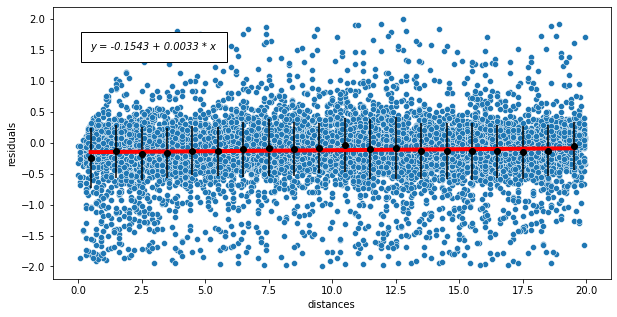

In [8]:
x = np.array([i + .5 for i in range(20)]) # bin centers
y = np.zeros(20)
erry = np.zeros(20)

for i in range(20):
    y[i] = data['residuals'][(data['distances'] >= i) & (data['distances'] < i + 1)].mean()
    erry[i] = data['residuals'][(data['distances'] >= i) & (data['distances'] < i + 1)].std()
    
fig, ax = plt.subplots(figsize=(10,5))

# scatter plot
sns.scatterplot(x='distances', y='residuals', data=data[data['distances'] < 20], ax=ax)

# linear regression
ax.plot(x, reg.intercept + reg.slope*x, color='red', linewidth=4)
text = "y = %.4f + %.4f * x" % (reg.intercept, reg.slope)
ax.text(0.5, 1.5, text, style='italic', bbox={'facecolor': 'white', 'pad': 10})

# profile plot
ax.errorbar(x, y, yerr = erry, fmt='o', color='black')